In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import urllib
dataset = 'mnist.pkl.gz'
def reporthook(a,b,c):
    print "\rdownloading: %5.1f%%"%(a*b*100.0/c),
    
if not os.path.isfile(dataset):
        origin = "https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz"
        print('Downloading data from %s' % origin)
        urllib.urlretrieve(origin, dataset, reporthook=reporthook)

downloading: 100.0%


In [3]:
import gzip
import pickle
with gzip.open(dataset, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)

In [4]:
print "train_set", train_set[0].shape, train_set[1].shape
print "valid_set", valid_set[0].shape, valid_set[1].shape
print "test_set", test_set[0].shape, test_set[1].shape

train_set (50000L, 784L) (50000L,)
valid_set (10000L, 784L) (10000L,)
test_set (10000L, 784L) (10000L,)


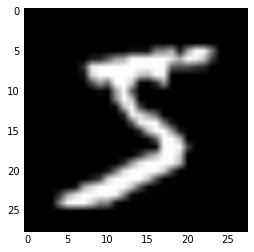

In [5]:
imshow(train_set[0][0].reshape((28, 28)), cmap="gray")

5
0
4
1
9


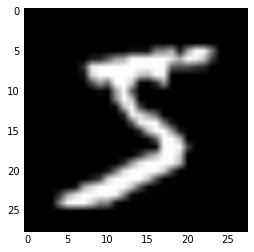

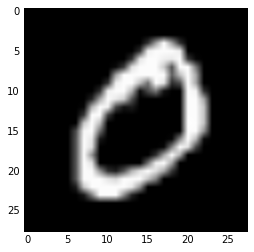

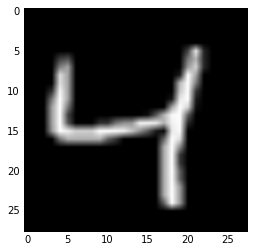

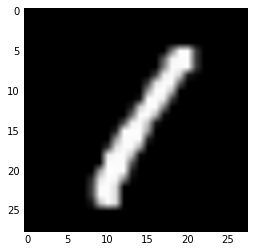

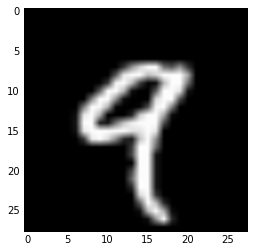

In [6]:
def show(x, i=[0]):
    plt.figure(i[0])
    imshow(x.reshape((28,28)), cmap="gray")
    i[0]+=1
for i in range(5):
    print train_set[1][i]
    show(train_set[0][i])

In [7]:
W = np.random.uniform(low=-1, high=1, size=(28*28,10))
b = np.random.uniform(low=-1, high=1, size=10)

In [8]:
x = train_set[0][0]
y = train_set[1][0]

5

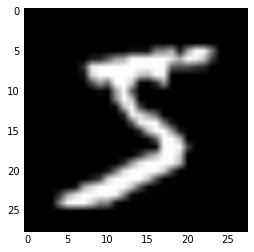

In [10]:
show(x)
y

In [9]:
Pr = exp(dot(x, W)+b)
Pr.shape

(10L,)

In [11]:
Pr = Pr/Pr.sum()
print Pr

[  6.12942168e-05   8.99815884e-03   6.36084733e-01   2.91752121e-03
   1.06838477e-01   2.85210218e-06   1.80305782e-01   9.07960590e-04
   1.37539641e-03   6.25078247e-02]


In [12]:
Pr.argmax()

2

In [13]:
loss = -log(Pr[y])
loss

12.767454229580922

In [14]:
gradb = Pr.copy()
gradb[y] -= 1
print gradb

[  6.12942168e-05   8.99815884e-03   6.36084733e-01   2.91752121e-03
   1.06838477e-01  -9.99997148e-01   1.80305782e-01   9.07960590e-04
   1.37539641e-03   6.25078247e-02]


In [16]:
print Pr.shape, x.shape, W.shape
gradW = dot(x.reshape(784,1), Pr.reshape(1,10), )
gradW[:, y] -= x

(10L,) (784L,) (784L, 10L)


In [17]:
W -= 0.1 * gradW
b -= 0.1 * gradb

In [20]:
W = np.random.uniform(low=-1, high=1, size=(28*28,10))
b = np.random.uniform(low=-1, high=1, size=10)
score = 0
N=50000*20
d = 0.001
learning_rate = 0.01
for i in xrange(N):
    if i%50000==0:
        print i, "%5.3f%%"%(score*100)
    x = train_set[0][i%50000]
    y = train_set[1][i%50000]
    Pr = exp(dot(x, W)+b)
    Pr = Pr/Pr.sum()
    loss = -log(Pr[y])
    score *=(1-d)
    if Pr.argmax() == y:
        score += d
    gradb = Pr.copy()
    gradb[y] -= 1
    gradW = dot(x.reshape(784,1), Pr.reshape(1,10), )
    gradW[:, y] -= x
    W -= learning_rate * gradW
    b -= learning_rate * gradb

0 0.000%
50000 88.197%
100000 89.566%
150000 89.913%
200000 90.396%
250000 91.010%
300000 91.026%
350000 91.106%
400000 91.085%
450000 91.261%
500000 91.235%
550000 91.323%
600000 91.576%
650000 91.651%
700000 91.554%
750000 91.596%
800000 91.656%
850000 91.745%
900000 91.836%
950000 91.865%
